In [303]:
import pandas as pd
import numpy as np

# Import et vérification

<div style="background-color: #80D0D0; padding: 10px; border: 1px solid #ccc;">
    <p>Verification des entrées, des colonnes, des types et des nuls/manquants</p>
</div>

## Customers

In [147]:
customers = pd.read_csv("customers.csv")

customers_enregistrements = len(customers)
print("Nombre d'enregistrements :", customers_enregistrements)

customers_colonnes = customers.columns
print("Colonnes :", customers_colonnes)

customers_types_colonnes = customers.dtypes
display("Types de données des colonnes :", customers_types_colonnes)

display(customers)

Nombre d'enregistrements : 8623
Colonnes : Index(['client_id', 'sex', 'birth'], dtype='object')


'Types de données des colonnes :'

client_id    object
sex          object
birth         int64
dtype: object

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [148]:
customers_nuls = customers.isnull().sum()
print("Nombre d'éléments nuls par variable :", customers_nuls)

Nombre d'éléments nuls par variable : client_id    0
sex          0
birth        0
dtype: int64


## Products 

In [149]:
products = pd.read_csv("products.csv")

products_enregistrements = len(products)
print("Nombre d'enregistrements :", products_enregistrements)

products_colonnes = products.columns
print("Colonnes :", products_colonnes)

products_types_colonnes = products.dtypes
display("Types de données des colonnes :", products_types_colonnes)

display(products)

Nombre d'enregistrements : 3287
Colonnes : Index(['id_prod', 'price', 'categ'], dtype='object')


'Types de données des colonnes :'

id_prod     object
price      float64
categ        int64
dtype: object

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [150]:
products_nuls = products.isnull().sum()
print("Nombre d'éléments nuls par variable :", products_nuls)

Nombre d'éléments nuls par variable : id_prod    0
price      0
categ      0
dtype: int64


## Transaction

In [151]:
transactions = pd.read_csv("transactions.csv")

transactions_enregistrements = len(transactions)
print("Nombre d'enregistrements :", transactions_enregistrements)

transactions_colonnes = transactions.columns
print("Colonnes :", transactions_colonnes)

transactions_types_colonnes = transactions.dtypes
display("Types de données des colonnes :", transactions_types_colonnes)

display(transactions)

Nombre d'enregistrements : 337016
Colonnes : Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')


'Types de données des colonnes :'

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [152]:
transactions_nuls = transactions.isnull().sum()
print("Nombre d'éléments nuls par variable :", transactions_nuls)

Nombre d'éléments nuls par variable : id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


<div style="background-color: #80D0D0; padding: 10px; border: 1px solid #ccc;">
    <p>Analyses clients/produits</p>
</div>

In [153]:
nombre_de_clients_sans_achat = 0

clients_sans_achat = set(customers['client_id']) - set(transactions['client_id'])

for client in clients_sans_achat:
    nombre_de_clients_sans_achat += 1

print("Nombre de clients n'ayant pas effectué d'achat :", nombre_de_clients_sans_achat)

Nombre de clients n'ayant pas effectué d'achat : 21


In [154]:
non_sold_products = len(set(products['id_prod']) - set(transactions['id_prod']))
print("Nombre de produits non vendus :", non_sold_products)

Nombre de produits non vendus : 22


# Jointures / Merge

<div style="background-color: #80D0D0; padding: 10px; border: 1px solid #ccc;">
    <p>Première jointure pour analyser products vs transactions</p>
</div>

In [155]:
df_products = pd.read_csv('products.csv')
df_transactions = pd.read_csv('transactions.csv')

df_transproduct = pd.merge(df_products, df_transactions, on='id_prod', how='outer')

display(df_transproduct)

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2021-05-12 23:26:29.885083,s_33709,c_7954
1,0_1421,19.99,0.0,2022-01-25 11:27:39.357012,s_154957,c_254
2,0_1421,19.99,0.0,2022-01-02 22:29:33.796003,s_144068,c_5770
3,0_1421,19.99,0.0,2021-03-05 17:10:40.265676,s_2187,c_1455
4,0_1421,19.99,0.0,2021-03-29 13:55:04.422637,s_13112,c_2768
...,...,...,...,...,...,...
337033,0_2245,NaN,NaN,2021-04-06 19:59:19.462288,s_16936,c_4167
337034,0_2245,NaN,NaN,2021-03-30 23:29:02.347672,s_13738,c_7790
337035,0_2245,NaN,NaN,2021-12-03 14:14:40.444177,s_128815,c_6189
337036,0_2245,NaN,NaN,2021-04-27 18:58:47.703374,s_26624,c_1595


In [258]:
nan_prod_ids = df_transproduct.loc[df_transproduct['id_prod'].isna()]

display(nan_prod_ids)

,client_id,sex,birth,id_prod,date,session_id
29516,c_8253,f,2001,NaN,NaN,NaN
99355,c_3789,f,1997,NaN,NaN,NaN
108189,c_4406,f,1998,NaN,NaN,NaN
109402,c_2706,f,1967,NaN,NaN,NaN
112024,c_3443,m,1959,NaN,NaN,NaN
123387,c_4447,m,1956,NaN,NaN,NaN
123641,c_3017,f,1992,NaN,NaN,NaN
129598,c_4086,f,1992,NaN,NaN,NaN
155507,c_6930,m,2004,NaN,NaN,NaN
158748,c_4358,m,1999,NaN,NaN,NaN


In [263]:
nan_prod_ids.to_csv('produit_non_vendu.csv', index=False)

<div style="background-color: #80D0D0; padding: 10px; border: 1px solid #ccc;">
    <p>Deuxieme jointure pour analyser customers vs transactions </p>
</div>

In [260]:
df_customers = pd.read_csv('customers.csv')
df_transactions = pd.read_csv('transactions.csv')

df_transcustom = pd.merge(df_customers, df_transactions, on='client_id', how='outer')

display(df_transcustom)

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942
1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984
2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960
3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860
4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715
...,...,...,...,...,...,...
337032,c_84,f,1982,1_459,2022-02-17 00:16:56.629536,s_166337
337033,c_84,f,1982,0_1050,2021-09-20 10:05:37.086910,s_92701
337034,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960
337035,c_84,f,1982,1_343,2021-04-13 03:59:33.614841,s_19845


In [262]:
nan_client_ids = df_transcustom.loc[df_transcustom['session_id'].isna()]

display(nan_client_ids)

,client_id,sex,birth,id_prod,date,session_id
29516,c_8253,f,2001,NaN,NaN,NaN
99355,c_3789,f,1997,NaN,NaN,NaN
108189,c_4406,f,1998,NaN,NaN,NaN
109402,c_2706,f,1967,NaN,NaN,NaN
112024,c_3443,m,1959,NaN,NaN,NaN
123387,c_4447,m,1956,NaN,NaN,NaN
123641,c_3017,f,1992,NaN,NaN,NaN
129598,c_4086,f,1992,NaN,NaN,NaN
155507,c_6930,m,2004,NaN,NaN,NaN
158748,c_4358,m,1999,NaN,NaN,NaN


In [264]:
nan_client_ids.to_csv('client_sans_achat.csv', index=False)

<div style="background-color: #80D0D0; padding: 10px; border: 1px solid #ccc;">
    <p>Déduire le prix du id_product 0_2245 et ajouter sa categ puis remplacer les NaN </p>
</div>

In [156]:
prix_moyen = df_transproduct['price'].mean()
print("La moyenne des prix est :", prix_moyen)

La moyenne des prix est : 17.205621380978524


In [157]:
df_transproduct.loc[df_transproduct['id_prod'] == '0_2245', 'price'] = 17.21
df_transproduct.loc[df_transproduct['id_prod'] == '0_2245', 'categ'] = '0.0'

display(df_transproduct)

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2021-05-12 23:26:29.885083,s_33709,c_7954
1,0_1421,19.99,0.0,2022-01-25 11:27:39.357012,s_154957,c_254
2,0_1421,19.99,0.0,2022-01-02 22:29:33.796003,s_144068,c_5770
3,0_1421,19.99,0.0,2021-03-05 17:10:40.265676,s_2187,c_1455
4,0_1421,19.99,0.0,2021-03-29 13:55:04.422637,s_13112,c_2768
...,...,...,...,...,...,...
337033,0_2245,17.21,0.0,2021-04-06 19:59:19.462288,s_16936,c_4167
337034,0_2245,17.21,0.0,2021-03-30 23:29:02.347672,s_13738,c_7790
337035,0_2245,17.21,0.0,2021-12-03 14:14:40.444177,s_128815,c_6189
337036,0_2245,17.21,0.0,2021-04-27 18:58:47.703374,s_26624,c_1595


<div style="background-color: #80D0D0; padding: 10px; border: 1px solid #ccc;">
    <p>Jointure final</p>
</div>

In [158]:
df_final = pd.merge(customers, df_transproduct, how='inner')

display(df_final)

,client_id,sex,birth,id_prod,price,categ,date,session_id
0,c_4410,f,1967,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707
1,c_4410,f,1967,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715
2,c_4410,f,1967,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707
3,c_4410,f,1967,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236
4,c_4410,f,1967,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740
...,...,...,...,...,...,...,...,...
337011,c_84,f,1982,0_1452,13.77,0.0,2021-09-20 10:11:35.510099,s_92701
337012,c_84,f,1982,1_158,22.17,1.0,2021-10-01 16:11:20.841361,s_98493
337013,c_84,f,1982,0_1438,9.31,0.0,2021-12-29 06:11:50.316631,s_141701
337014,c_84,f,1982,1_459,15.99,1.0,2022-02-17 00:16:56.629536,s_166337


<div style="background-color: #80D0D0; padding: 10px; border: 1px solid #ccc;">
    <p>Vérification des doublons</p>
</div>

In [287]:
doublons = df_final[df_final.duplicated()]

display(doublons)

,client_id,sex,birth,id_prod,price,categ,date,session_id
108193,ct_0,f,2001,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237443,s_0
108200,ct_0,f,2001,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237429,s_0
108203,ct_0,f,2001,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237446,s_0
108204,ct_0,f,2001,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237446,s_0
108207,ct_0,f,2001,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237442,s_0
...,...,...,...,...,...,...,...,...
332778,ct_1,m,2001,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237416,s_0
332779,ct_1,m,2001,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237425,s_0
332780,ct_1,m,2001,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237423,s_0
332781,ct_1,m,2001,T_0,-1.0,0.0,test_2021-03-01 02:30:02.237421,s_0


<div style="background-color: #80D0D0; padding: 10px; border: 1px solid #ccc;">
    <p>Nettoyage pour des données prêtes à être exploitées</p>
</div>

In [160]:
df_propre = df_final[df_final['price'] >= 0]

display(df_propre)

,client_id,sex,birth,id_prod,price,categ,date,session_id
0,c_4410,f,1967,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707
1,c_4410,f,1967,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715
2,c_4410,f,1967,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707
3,c_4410,f,1967,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236
4,c_4410,f,1967,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740
...,...,...,...,...,...,...,...,...
337011,c_84,f,1982,0_1452,13.77,0.0,2021-09-20 10:11:35.510099,s_92701
337012,c_84,f,1982,1_158,22.17,1.0,2021-10-01 16:11:20.841361,s_98493
337013,c_84,f,1982,0_1438,9.31,0.0,2021-12-29 06:11:50.316631,s_141701
337014,c_84,f,1982,1_459,15.99,1.0,2022-02-17 00:16:56.629536,s_166337


In [190]:
print(df_propre['date'].dtypes)

object


In [197]:
df_propre.loc[:, 'date'] = pd.to_datetime(df_propre['date'])

print(df_propre['date'].dtypes)

datetime64[ns]


# Répartition des catégories

In [169]:
df_propre['categ0'] = (df_propre['categ'] == 0).astype(int)
df_propre['categ1'] = (df_propre['categ'] == 1).astype(int)
df_propre['categ2'] = (df_propre['categ'] == 2).astype(int)

categ0_counts = df_propre.groupby('client_id')['categ0'].sum()
categ1_counts = df_propre.groupby('client_id')['categ1'].sum()
categ2_counts = df_propre.groupby('client_id')['categ2'].sum()

display(categ0_counts)
display(categ1_counts)
display(categ2_counts)

/tmp/ipykernel_16376/3386541569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propre['categ0'] = (df_propre['categ'] == 0).astype(int)
/tmp/ipykernel_16376/3386541569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propre['categ1'] = (df_propre['categ'] == 1).astype(int)
/tmp/ipykernel_16376/3386541569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

client_id
c_1       15
c_10      10
c_100      2
c_1000    20
c_1001    43
          ..
c_995      5
c_996     17
c_997     10
c_998      7
c_999     11
Name: categ0, Length: 8600, dtype: int64

client_id
c_1        4
c_10      17
c_100      3
c_1000    36
c_1001    14
          ..
c_995      3
c_996     25
c_997      7
c_998      6
c_999     11
Name: categ1, Length: 8600, dtype: int64

client_id
c_1        1
c_10       1
c_100      1
c_1000     0
c_1001     1
          ..
c_995      0
c_996      0
c_997      6
c_998     15
c_999      0
Name: categ2, Length: 8600, dtype: int64

# CA par catégorie et par clients - 1 ligne par client

## Avec les 4 valeurs abérantes

### Prix par catégorie

In [120]:
df_propre.loc[df_propre['categ'] == 0.0, '0'] = df_propre['price']
df_propre['0'] = df_propre['0'].fillna(0)

display(df_propre)

/tmp/ipykernel_1283/1445691874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propre['0'] = df_propre['0'].fillna(0)


,client_id,sex,birth,id_prod,price,categ,date,session_id,categ0,categ1,categ2,0
0,c_4410,f,1967,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707,0,1,0,0.00
1,c_4410,f,1967,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715,1,0,0,4.71
2,c_4410,f,1967,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707,1,0,0,19.99
3,c_4410,f,1967,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236,0,1,0,0.00
4,c_4410,f,1967,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740,0,1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
337011,c_84,f,1982,0_1452,13.77,0.0,2021-09-20 10:11:35.510099,s_92701,1,0,0,13.77
337012,c_84,f,1982,1_158,22.17,1.0,2021-10-01 16:11:20.841361,s_98493,0,1,0,0.00
337013,c_84,f,1982,0_1438,9.31,0.0,2021-12-29 06:11:50.316631,s_141701,1,0,0,9.31
337014,c_84,f,1982,1_459,15.99,1.0,2022-02-17 00:16:56.629536,s_166337,0,1,0,0.00


In [121]:
df_propre.loc[df_propre['categ'] == 1.0, '1'] = df_propre['price']
df_propre['1'] = df_propre['1'].fillna(0)

display(df_propre)

/tmp/ipykernel_1283/2500991331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propre.loc[df_propre['categ'] == 1.0, '1'] = df_propre['price']
/tmp/ipykernel_1283/2500991331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propre['1'] = df_propre['1'].fillna(0)


,client_id,sex,birth,id_prod,price,categ,date,session_id,categ0,categ1,categ2,0,1
0,c_4410,f,1967,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707,0,1,0,0.00,25.99
1,c_4410,f,1967,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715,1,0,0,4.71,0.00
2,c_4410,f,1967,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707,1,0,0,19.99,0.00
3,c_4410,f,1967,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236,0,1,0,0.00,12.99
4,c_4410,f,1967,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740,0,1,0,0.00,11.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337011,c_84,f,1982,0_1452,13.77,0.0,2021-09-20 10:11:35.510099,s_92701,1,0,0,13.77,0.00
337012,c_84,f,1982,1_158,22.17,1.0,2021-10-01 16:11:20.841361,s_98493,0,1,0,0.00,22.17
337013,c_84,f,1982,0_1438,9.31,0.0,2021-12-29 06:11:50.316631,s_141701,1,0,0,9.31,0.00
337014,c_84,f,1982,1_459,15.99,1.0,2022-02-17 00:16:56.629536,s_166337,0,1,0,0.00,15.99


In [122]:
df_propre.loc[df_propre['categ'] == 2.0, '2'] = df_propre['price']
df_propre['2'] = df_propre['2'].fillna(0)

display(df_propre)

/tmp/ipykernel_1283/2866697649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propre.loc[df_propre['categ'] == 2.0, '2'] = df_propre['price']
/tmp/ipykernel_1283/2866697649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_propre['2'] = df_propre['2'].fillna(0)


,client_id,sex,birth,id_prod,price,categ,date,session_id,categ0,categ1,categ2,0,1,2
0,c_4410,f,1967,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707,0,1,0,0.00,25.99,0.0
1,c_4410,f,1967,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715,1,0,0,4.71,0.00,0.0
2,c_4410,f,1967,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707,1,0,0,19.99,0.00,0.0
3,c_4410,f,1967,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236,0,1,0,0.00,12.99,0.0
4,c_4410,f,1967,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740,0,1,0,0.00,11.21,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337011,c_84,f,1982,0_1452,13.77,0.0,2021-09-20 10:11:35.510099,s_92701,1,0,0,13.77,0.00,0.0
337012,c_84,f,1982,1_158,22.17,1.0,2021-10-01 16:11:20.841361,s_98493,0,1,0,0.00,22.17,0.0
337013,c_84,f,1982,0_1438,9.31,0.0,2021-12-29 06:11:50.316631,s_141701,1,0,0,9.31,0.00,0.0
337014,c_84,f,1982,1_459,15.99,1.0,2022-02-17 00:16:56.629536,s_166337,0,1,0,0.00,15.99,0.0


### Aggrégation

In [126]:
df_clients = df_propre.groupby('client_id').agg({
    'price': 'sum',
    '0': 'sum',
    '1': 'sum',
    '2': 'sum',
    'session_id': pd.Series.nunique,
    'date': 'max',
    'birth': 'first',
    'sex': 'first'
})

df_clients.columns = ['Prix total', 'CA Categ 0', 'CA Categ 1', 'CA Categ 2', 'Fréquence', 'Dernière connexion', 'Année', 'Sexe']

display(df_clients)

,Prix total,CA Categ 0,CA Categ 1,CA Categ 2,Fréquence,Dernière connexion,Année,Sexe
client_id,,,,,,,,
c_1,300.65,174.20,71.58,54.87,15,2022-02-01 01:47:04.355850,1955,m
c_10,586.18,124.92,391.27,69.99,16,2021-12-14 09:16:40.399630,1956,m
c_100,222.87,31.38,52.96,138.53,3,2021-08-10 15:58:52.647110,1992,m
c_1000,980.02,169.85,810.17,0.00,42,2022-02-28 08:19:38.189089,1966,f
c_1001,1102.45,527.81,274.64,300.00,24,2022-02-26 15:08:28.714777,1982,m
...,...,...,...,...,...,...,...,...
c_995,119.08,55.34,63.74,0.00,5,2021-11-04 12:35:05.210300,1955,m
c_996,739.60,204.70,534.90,0.00,36,2022-02-06 16:40:04.292360,1970,f
c_997,572.89,84.86,158.92,329.11,10,2022-01-05 02:02:14.787358,1994,f


### Calcule Panier Moyen

In [127]:
df_clients['Panier Moyen'] = df_clients['Prix total'] / df_clients['Fréquence']
display(df_clients)

,Prix total,CA Categ 0,CA Categ 1,CA Categ 2,Fréquence,Dernière connexion,Année,Sexe,Panier Moyen
client_id,,,,,,,,,
c_1,300.65,174.20,71.58,54.87,15,2022-02-01 01:47:04.355850,1955,m,20.043333
c_10,586.18,124.92,391.27,69.99,16,2021-12-14 09:16:40.399630,1956,m,36.636250
c_100,222.87,31.38,52.96,138.53,3,2021-08-10 15:58:52.647110,1992,m,74.290000
c_1000,980.02,169.85,810.17,0.00,42,2022-02-28 08:19:38.189089,1966,f,23.333810
c_1001,1102.45,527.81,274.64,300.00,24,2022-02-26 15:08:28.714777,1982,m,45.935417
...,...,...,...,...,...,...,...,...,...
c_995,119.08,55.34,63.74,0.00,5,2021-11-04 12:35:05.210300,1955,m,23.816000
c_996,739.60,204.70,534.90,0.00,36,2022-02-06 16:40:04.292360,1970,f,20.544444
c_997,572.89,84.86,158.92,329.11,10,2022-01-05 02:02:14.787358,1994,f,57.289000


### Ajout colonne Age

In [130]:
from datetime import datetime

current_year = datetime.now().year

df_clients['Age'] = current_year - df_clients['Année']

display(df_clients)

,Prix total,CA Categ 0,CA Categ 1,CA Categ 2,Fréquence,Dernière connexion,Année,Sexe,Panier Moyen,age,Age
client_id,,,,,,,,,,,
c_1,300.65,174.20,71.58,54.87,15,2022-02-01 01:47:04.355850,1955,m,20.043333,69,69
c_10,586.18,124.92,391.27,69.99,16,2021-12-14 09:16:40.399630,1956,m,36.636250,68,68
c_100,222.87,31.38,52.96,138.53,3,2021-08-10 15:58:52.647110,1992,m,74.290000,32,32
c_1000,980.02,169.85,810.17,0.00,42,2022-02-28 08:19:38.189089,1966,f,23.333810,58,58
c_1001,1102.45,527.81,274.64,300.00,24,2022-02-26 15:08:28.714777,1982,m,45.935417,42,42
...,...,...,...,...,...,...,...,...,...,...,...
c_995,119.08,55.34,63.74,0.00,5,2021-11-04 12:35:05.210300,1955,m,23.816000,69,69
c_996,739.60,204.70,534.90,0.00,36,2022-02-06 16:40:04.292360,1970,f,20.544444,54,54
c_997,572.89,84.86,158.92,329.11,10,2022-01-05 02:02:14.787358,1994,f,57.289000,30,30


### Récences 

In [266]:
from datetime import datetime

df_clients['Dernière connexion'] = pd.to_datetime(df_clients['Dernière connexion'])

current_date = datetime.now()

df_clients['Recence'] = (current_date - df_clients['Dernière connexion']).dt.days

display(df_clients)

,Sexe,Age,Année,Fréquence,Prix total,Panier Moyen,CA Categ 0,CA Categ 1,CA Categ 2,Dernière connexion,Recence
client_id,,,,,,,,,,,
c_1,m,69,1955,15,300.65,20.043333,174.20,71.58,54.87,2022-02-01 01:47:04.355850,776
c_10,m,68,1956,16,586.18,36.636250,124.92,391.27,69.99,2021-12-14 09:16:40.399630,825
c_100,m,32,1992,3,222.87,74.290000,31.38,52.96,138.53,2021-08-10 15:58:52.647110,950
c_1000,f,58,1966,42,980.02,23.333810,169.85,810.17,0.00,2022-02-28 08:19:38.189089,749
c_1001,m,42,1982,24,1102.45,45.935417,527.81,274.64,300.00,2022-02-26 15:08:28.714777,750
...,...,...,...,...,...,...,...,...,...,...,...
c_995,m,69,1955,5,119.08,23.816000,55.34,63.74,0.00,2021-11-04 12:35:05.210300,865
c_996,f,54,1970,36,739.60,20.544444,204.70,534.90,0.00,2022-02-06 16:40:04.292360,770
c_997,f,30,1994,10,572.89,57.289000,84.86,158.92,329.11,2022-01-05 02:02:14.787358,803


In [267]:
new_order = ['Sexe', 'Age', 'Année', 'Fréquence', 'Prix total', 'Panier Moyen', 'CA Categ 0', 'CA Categ 1', 'CA Categ 2', 'Dernière connexion', 'Recence']
df_clients = df_clients.reindex(columns=new_order)

display(df_clients)

,Sexe,Age,Année,Fréquence,Prix total,Panier Moyen,CA Categ 0,CA Categ 1,CA Categ 2,Dernière connexion,Recence
client_id,,,,,,,,,,,
c_1,m,69,1955,15,300.65,20.043333,174.20,71.58,54.87,2022-02-01 01:47:04.355850,776
c_10,m,68,1956,16,586.18,36.636250,124.92,391.27,69.99,2021-12-14 09:16:40.399630,825
c_100,m,32,1992,3,222.87,74.290000,31.38,52.96,138.53,2021-08-10 15:58:52.647110,950
c_1000,f,58,1966,42,980.02,23.333810,169.85,810.17,0.00,2022-02-28 08:19:38.189089,749
c_1001,m,42,1982,24,1102.45,45.935417,527.81,274.64,300.00,2022-02-26 15:08:28.714777,750
...,...,...,...,...,...,...,...,...,...,...,...
c_995,m,69,1955,5,119.08,23.816000,55.34,63.74,0.00,2021-11-04 12:35:05.210300,865
c_996,f,54,1970,36,739.60,20.544444,204.70,534.90,0.00,2022-02-06 16:40:04.292360,770
c_997,f,30,1994,10,572.89,57.289000,84.86,158.92,329.11,2022-01-05 02:02:14.787358,803


# Visualisation

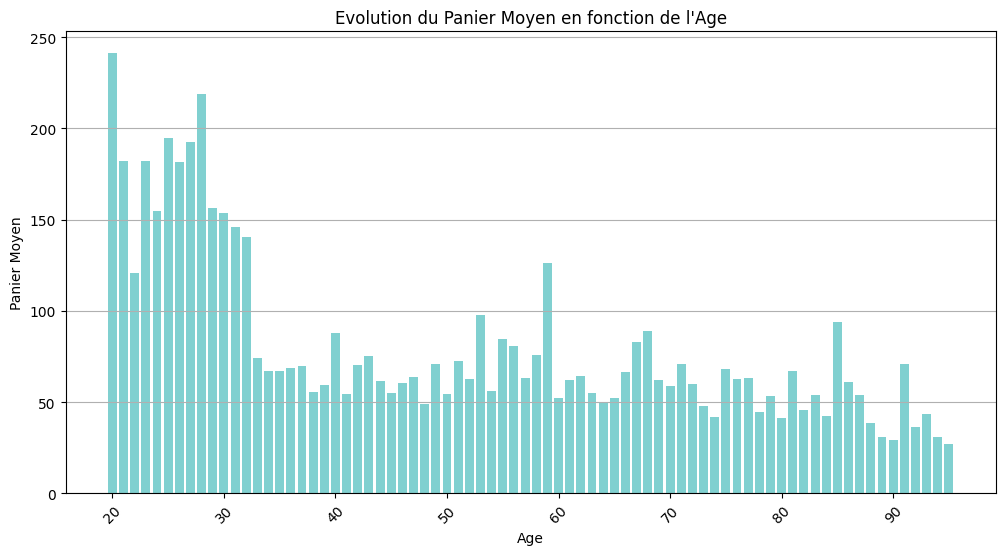

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df_clients['Age'], df_clients['Panier Moyen'], color='#80D0D0')
plt.xlabel('Age')
plt.ylabel('Panier Moyen')
plt.title('Evolution du Panier Moyen en fonction de l\'Age')
plt.xticks(rotation=45) 
plt.grid(axis='y') 
plt.show()

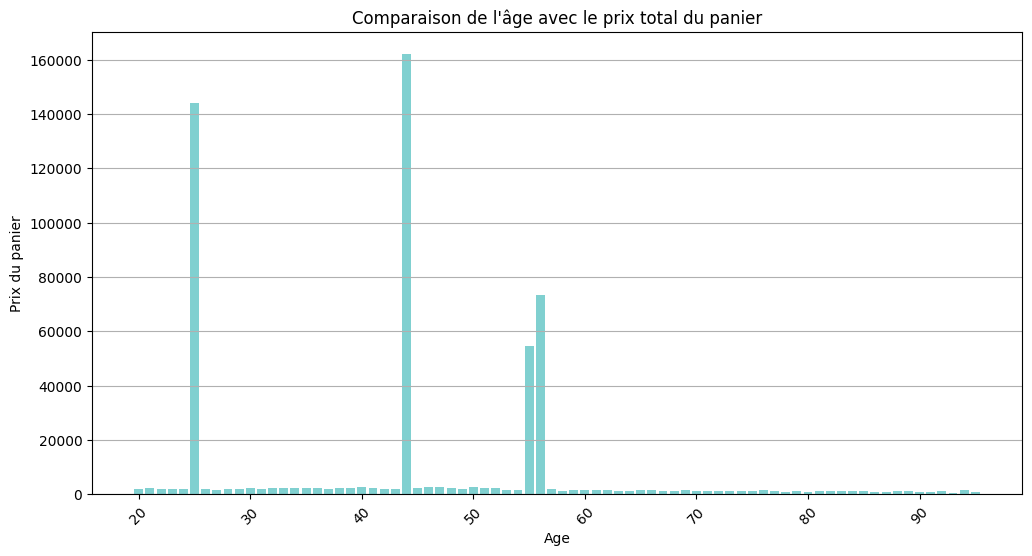

In [193]:
plt.figure(figsize=(12, 6))
plt.bar(df_clients['Age'], df_clients['Prix total'], color='#80D0D0')
plt.xlabel('Age')
plt.ylabel('Prix du panier')
plt.title('Comparaison de l\'âge avec le prix total du panier')
plt.xticks(rotation=45) 
plt.grid(axis='y') 
plt.show()

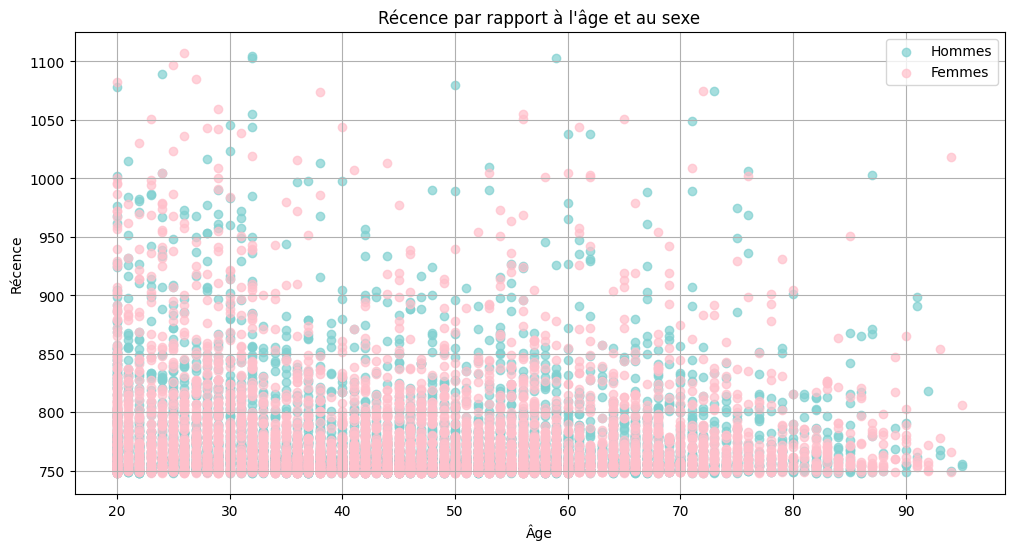

In [270]:
import matplotlib.pyplot as plt


# Diviser le DataFrame en sous-ensembles par sexe
df_hommes = df_clients[df_clients['Sexe'] == 'm']
df_femmes = df_clients[df_clients['Sexe'] == 'f']

# Créer un graphique
plt.figure(figsize=(12, 6))

# Nuage de points pour les hommes
plt.scatter(df_hommes['Age'], df_hommes['Recence'], color='#80D0D0', label='Hommes', alpha=0.7)

# Nuage de points pour les femmes
plt.scatter(df_femmes['Age'], df_femmes['Recence'], color='pink', label='Femmes', alpha=0.7)

plt.xlabel('Âge')
plt.ylabel('Récence')
plt.title('Récence par rapport à l\'âge et au sexe')
plt.legend()
plt.grid(True)
plt.show()


In [281]:
import pandas as pd

ventes_par_categorie = df_propre.groupby('categ')['price'].sum().reset_index()
total_ventes = ventes_par_categorie['price'].sum()
ventes_par_categorie['proportion en %'] = ventes_par_categorie['price'] / total_ventes * 100

display(ventes_par_categorie)

,categ,price,proportion en %
0,0.0,2229722.65,38.454431
1,1.0,2247384.41,38.759031
2,2.0,1319470.71,22.755967
3,0.0,1772.63,0.030571


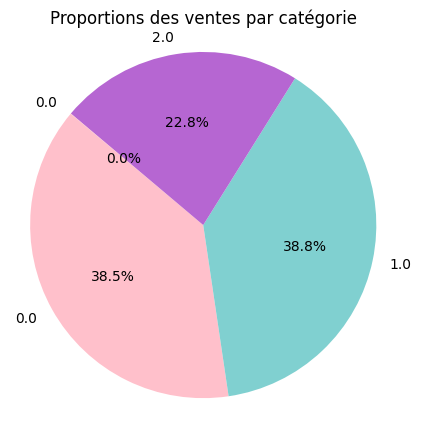

In [280]:
import pandas as pd
import matplotlib.pyplot as plt

ventes_par_categorie = df_propre.groupby('categ')['price'].sum().reset_index()
total_ventes = ventes_par_categorie['price'].sum()
ventes_par_categorie['proportion en %'] = ventes_par_categorie['price'] / total_ventes * 100

couleurs = ['pink', '#80D0D0', '#B666D2']

plt.figure(figsize=(5, 5))
plt.pie(ventes_par_categorie['proportion en %'], labels=ventes_par_categorie['categ'], autopct='%1.1f%%', startangle=140, colors=couleurs)
plt.title('Proportions des ventes par catégorie')
plt.axis('equal')
plt.show()

In [282]:
chiffre_affaires_par_categorie = df_propre.groupby('categ')['price'].sum().reset_index()
chiffre_affaires_par_categorie = chiffre_affaires_par_categorie.rename(columns={'price': 'chiffre d\'affaires en €'})

display(chiffre_affaires_par_categorie)

,categ,chiffre d'affaires en €
0,0.0,2229722.65
1,1.0,2247384.41
2,2.0,1319470.71
3,0.0,1772.63


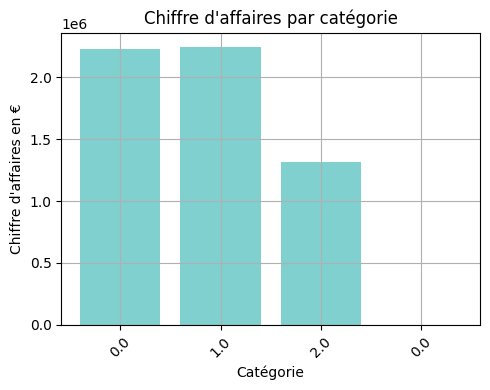

In [285]:
import matplotlib.pyplot as plt

categories = chiffre_affaires_par_categorie['categ']
chiffre_affaires = chiffre_affaires_par_categorie['chiffre d\'affaires en €']

positions = range(len(categories))

plt.figure(figsize=(5, 4))  
plt.bar(positions, chiffre_affaires, color='#80D0D0')
plt.grid(True)
plt.title('Chiffre d\'affaires par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Chiffre d\'affaires en €')
plt.xticks(positions, categories, rotation=45)
plt.tight_layout() 
plt.show()


## Sans les 4 valeurs abérantes

In [168]:
df_sans_top4 = df_clients.sort_values(by='Prix total')

display(df_sans_top4)

,Sexe,Age,Année,Fréquence,Prix total,Panier Moyen,CA Categ 0,CA Categ 1,CA Categ 2,Dernière connexion,Recence
client_id,,,,,,,,,,,
c_8140,m,53,1971,1,4.15,4.150000,4.15,0.00,0.00,2021-06-12 11:30:18.492800,1009
c_8114,m,62,1962,1,4.99,4.990000,4.99,0.00,0.00,2021-05-15 08:17:35.835342,1038
c_1675,f,24,2000,1,5.57,5.570000,5.57,0.00,0.00,2021-06-17 13:03:04.694904,1004
c_890,f,22,2002,1,6.08,6.080000,6.08,0.00,0.00,2021-07-21 18:30:48.546203,970
c_8351,f,56,1968,1,6.31,6.310000,6.31,0.00,0.00,2021-10-26 11:46:21.315246,873
...,...,...,...,...,...,...,...,...,...,...,...
c_7959,f,50,1974,76,2564.25,33.740132,1767.91,796.34,0.00,2022-02-28 13:36:25.395541,748
c_3454,m,55,1969,2711,54477.34,20.094924,14196.35,39766.51,480.06,2022-02-28 22:49:51.016896,748
c_6714,f,56,1968,1286,73231.76,56.945381,28218.49,34718.85,10260.00,2022-02-28 19:09:06.712565,748


In [170]:
df_sans_top4 = df_sans_top4.drop(df_sans_top4.tail(4).index)

display(df_sans_top4)

,Sexe,Age,Année,Fréquence,Prix total,Panier Moyen,CA Categ 0,CA Categ 1,CA Categ 2,Dernière connexion,Recence
client_id,,,,,,,,,,,
c_8140,m,53,1971,1,4.15,4.150000,4.15,0.00,0.00,2021-06-12 11:30:18.492800,1009
c_8114,m,62,1962,1,4.99,4.990000,4.99,0.00,0.00,2021-05-15 08:17:35.835342,1038
c_1675,f,24,2000,1,5.57,5.570000,5.57,0.00,0.00,2021-06-17 13:03:04.694904,1004
c_890,f,22,2002,1,6.08,6.080000,6.08,0.00,0.00,2021-07-21 18:30:48.546203,970
c_8351,f,56,1968,1,6.31,6.310000,6.31,0.00,0.00,2021-10-26 11:46:21.315246,873
...,...,...,...,...,...,...,...,...,...,...,...
c_8392,f,46,1978,79,2515.98,31.847848,1682.04,833.94,0.00,2022-02-28 03:04:06.005698,749
c_2140,f,47,1977,74,2527.01,34.148784,1629.90,751.12,145.99,2022-02-22 16:20:49.146964,754
c_4491,f,40,1984,73,2540.53,34.801781,1267.80,1115.74,156.99,2022-02-28 19:52:17.340576,748


### Visualisation

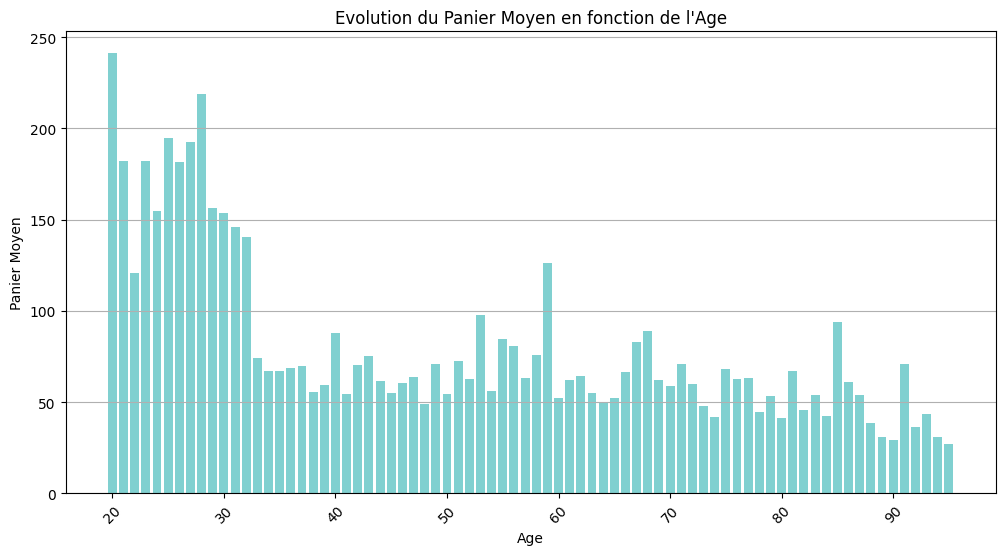

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df_clients['Age'], df_clients['Panier Moyen'], color='#80D0D0')
plt.xlabel('Age')
plt.ylabel('Panier Moyen')
plt.title('Evolution du Panier Moyen en fonction de l\'Age')
plt.xticks(rotation=45)  
plt.grid(axis='y') 
plt.show()

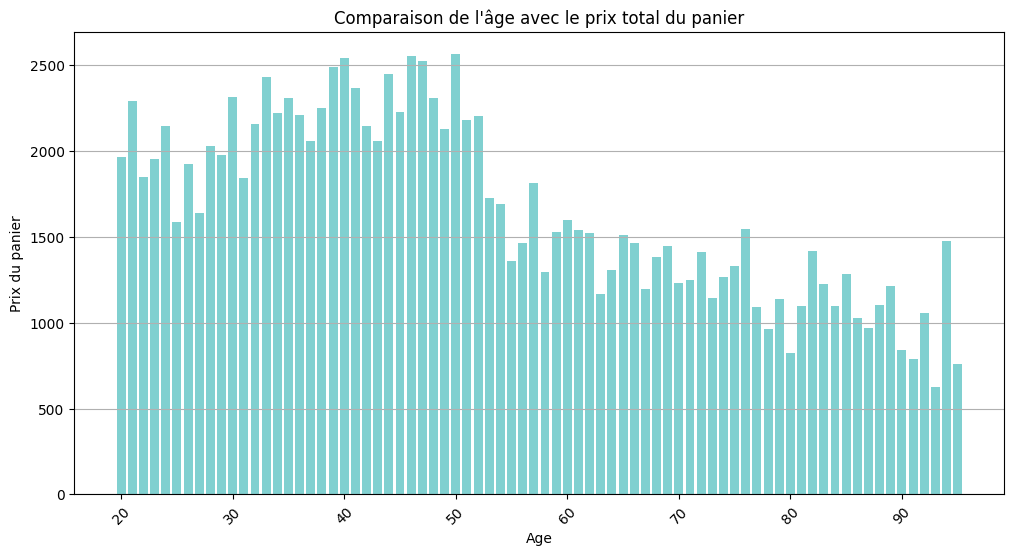

In [194]:
plt.figure(figsize=(12, 6))
plt.bar(df_sans_top4['Age'], df_sans_top4['Prix total'], color='#80D0D0')
plt.xlabel('Age')
plt.ylabel('Prix du panier')
plt.title('Comparaison de l\'âge avec le prix total du panier')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()

# Corrélation

## Corrélation entre l'âge et le panier moyen 

<div style="background-color: #80D0D0; padding: 10px; border: 1px solid #ccc;">
    <p>Avec les 4 valeurs aberrantes</p>
</div>

In [196]:
import pandas as pd

sub_df = df_clients[['Panier Moyen', 'Année']]

correlation_matrix = sub_df.corr()

display(correlation_matrix)

,Panier Moyen,Année
Panier Moyen,1.000000,0.635175
Année,0.635175,1.000000


In [288]:
import pandas as pd

sub_df = df_clients[['Panier Moyen', 'Age']]

correlation_matrix = sub_df.corr()

display(correlation_matrix)

,Panier Moyen,Age
Panier Moyen,1.000000,-0.635175
Age,-0.635175,1.000000


<Figure size 300x300 with 0 Axes>

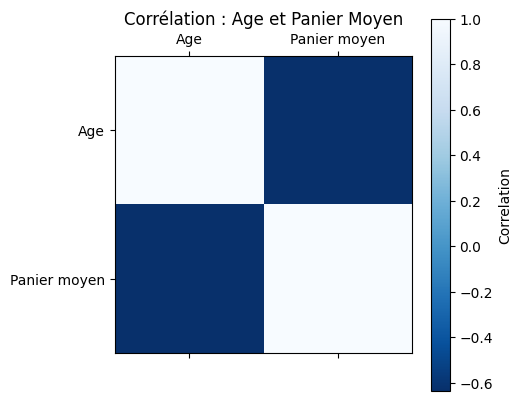

In [304]:
import matplotlib.pyplot as plt
import numpy as np

r = -0.635175  

correlation_matrix = np.array([[1, r],
                                [r, 1]])

plt.figure(figsize=(3, 3)) 

plt.matshow(correlation_matrix, cmap='Blues_r') 
plt.colorbar(label='Correlation')  
plt.xticks([0, 1], ['Age', 'Panier moyen'])
plt.yticks([0, 1], ['Age', 'Panier moyen'])
plt.title('Corrélation : Age et Panier Moyen')
plt.show()


<div style="background-color: #80D0D0; padding: 10px; border: 1px solid #ccc;">
    <p>Sans les 4 valeurs aberrantes</p>
</div>

In [290]:
import pandas as pd

sub_df = df_sans_top4[['Panier Moyen', 'Age']]

correlation_matrix2 = sub_df.corr()

display(correlation_matrix2)

,Panier Moyen,Age
Panier Moyen,1.000000,-0.635181
Age,-0.635181,1.000000


<Figure size 300x300 with 0 Axes>

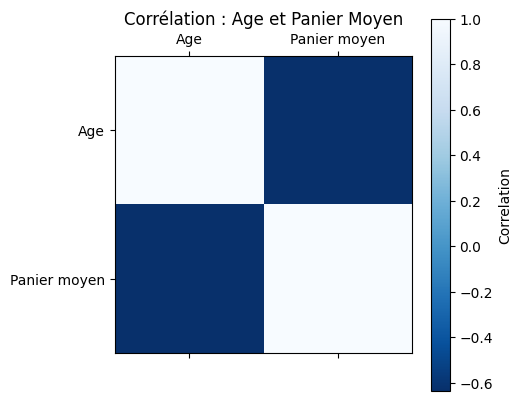

In [298]:
import matplotlib.pyplot as plt
import numpy as np

r = -0.635175 

correlation_matrix2 = np.array([[1, r],
                                [r, 1]])
plt.figure(figsize=(3, 3)) 

plt.matshow(correlation_matrix2, cmap='Blues_r')  
plt.colorbar(label='Correlation') 
plt.xticks([0, 1], ['Age', 'Panier moyen'])
plt.yticks([0, 1], ['Age', 'Panier moyen'])
plt.title('Corrélation : Age et Panier Moyen')
plt.show()


## Corrélation entre Age et CA total

<div style="background-color: #80D0D0; padding: 10px; border: 1px solid #ccc;">
    <p>Avec les 4 valeurs aberrantes</p>
</div>

In [293]:
import pandas as pd

sub_df = df_clients[['Prix total', 'Age']]

correlation_matrix3 = sub_df.corr()

display(correlation_matrix3)

,Prix total,Age
Prix total,1.000000,-0.039303
Age,-0.039303,1.000000


<Figure size 300x300 with 0 Axes>

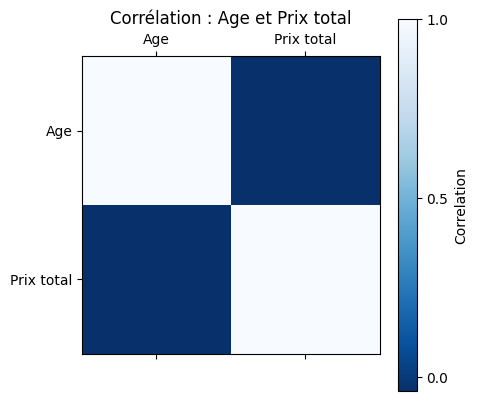

In [299]:
import matplotlib.pyplot as plt
import numpy as np

r = -0.039303 

correlation_matrix3 = np.array([[1, r],
                                [r, 1]])
plt.figure(figsize=(3, 3))

plt.matshow(correlation_matrix3, cmap='Blues_r')  
plt.colorbar(label='Correlation', ticks=np.arange(-1, 1.1, 0.5))
plt.xticks([0, 1], ['Age', 'Prix total'])
plt.yticks([0, 1], ['Age', 'Prix total'])
plt.title('Corrélation : Age et Prix total')
plt.show()

<div style="background-color: #80D0D0; padding: 10px; border: 1px solid #ccc;">
    <p>Sans les 4 valeurs aberrantes</p>
</div>

In [300]:
import pandas as pd

sub_df = df_sans_top4[['Prix total', 'Age']]

correlation_matrix4 = sub_df.corr()

display(correlation_matrix4)

,Prix total,Age
Prix total,1.000000,-0.190331
Age,-0.190331,1.000000


<Figure size 300x300 with 0 Axes>

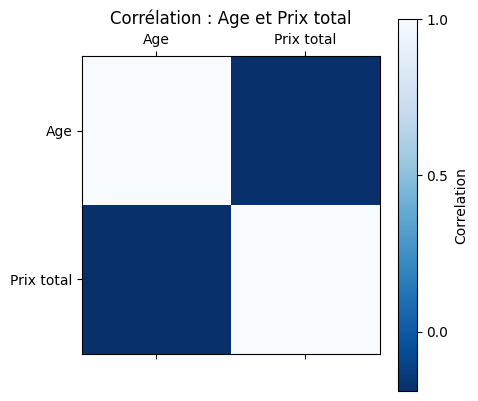

In [301]:
import matplotlib.pyplot as plt
import numpy as np

r = -0.190331 

correlation_matrix3 = np.array([[1, r],
                                [r, 1]])
plt.figure(figsize=(3, 3))

plt.matshow(correlation_matrix3, cmap='Blues_r')  
plt.colorbar(label='Correlation', ticks=np.arange(-1, 1.1, 0.5))
plt.xticks([0, 1], ['Age', 'Prix total'])
plt.yticks([0, 1], ['Age', 'Prix total'])
plt.title('Corrélation : Age et Prix total')
plt.show()

## Corrélation age, panier, CA

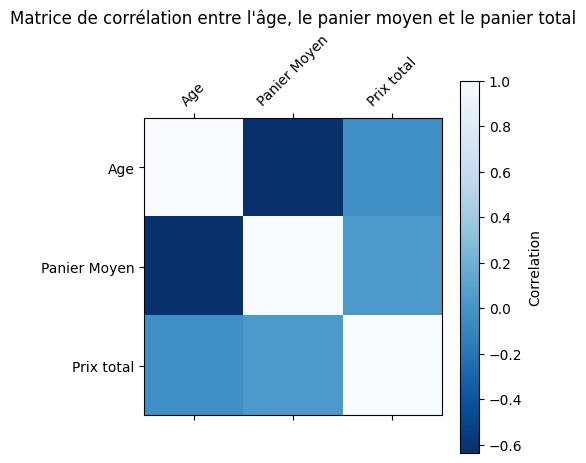

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sub_df = df_clients[['Age', 'Panier Moyen', 'Prix total']]

correlation_matrix = sub_df.corr()

plt.matshow(correlation_matrix, cmap='Blues_r') 
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matrice de corrélation entre l\'âge, le panier moyen et le panier total')
plt.show()

## Corrélation Générale

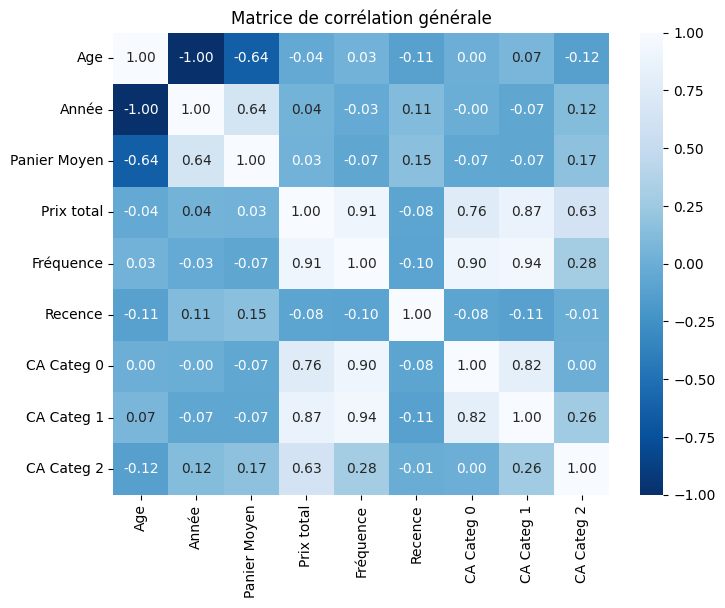

In [309]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sub_df = df_clients[['Age', 'Année', 'Panier Moyen', 'Prix total', 'Sexe', 'Fréquence', 'Recence', 'CA Categ 0', 'CA Categ 1', 'CA Categ 2']]

correlation_matrix = sub_df.corr()

plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='Blues_r', fmt=".2f") 
plt.title('Matrice de corrélation générale')
plt.show()


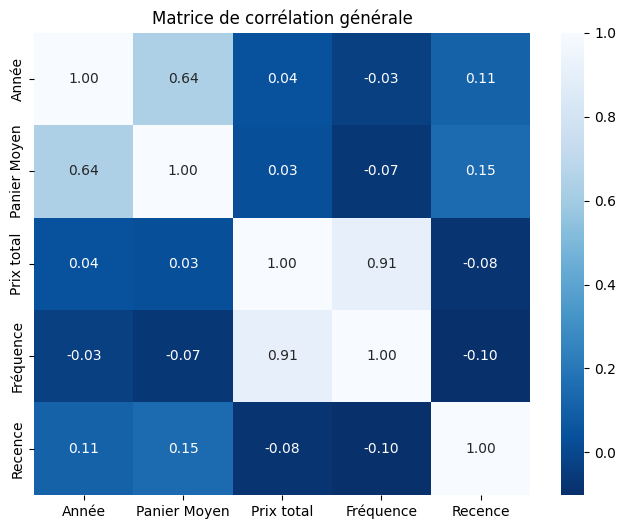

In [311]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sub_df = df_clients[['Année', 'Panier Moyen', 'Prix total', 'Sexe', 'Fréquence', 'Recence', ]]

correlation_matrix = sub_df.corr()

plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='Blues_r', fmt=".2f") 
plt.title('Matrice de corrélation générale')
plt.show()

## Pearson

In [222]:
from scipy.stats import pearsonr

r, _ = pearsonr(df_clients['Année'], df_clients['Panier Moyen'])

print("Coefficient de corrélation de Pearson:", r)

Coefficient de corrélation de Pearson: 0.6351751465166845


In [223]:
from scipy.stats import pearsonr

r, _ = pearsonr(df_clients['Année'], df_clients['Prix total'])

print("Coefficient de corrélation de Pearson:", r)

Coefficient de corrélation de Pearson: 0.03930279409836234
